In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/antonioskorin/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Inserciones

In [2]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.621203  1.264890  1.841725  2.318464   
1      hashing_cerrado_lineal  0.541962  1.103770  1.588928  2.065951   
2  hashing_cerrado_cuadratico  0.552798  1.086454  1.562214  1.951427   
3       hashing_cerrado_doble  0.604475  1.225067  1.763785  2.252035   
4                         stl  0.447073  0.905705  1.378199  1.669495   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.897589  3.548574  4.255251  4.889641  5.997307  ...  6.998638  7.808023   
1  2.487824  3.113986  3.650075  4.276565  5.079870  ...  6.341195  6.639911   
2  2.455476  3.098047  3.568512  4.246076  5.054662  ...  5.908313  6.605793   
3  2.777142  3.485833  4.115156  4.896431  5.771396  ...  6.981075  7.788170   
4  2.070393  2.761210  3.225690  3.904454  4.458030  ...  5.845100  6.111791   

      13000     14000     15000     16000      17000      18000      19000  \
0 

In [3]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')

df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

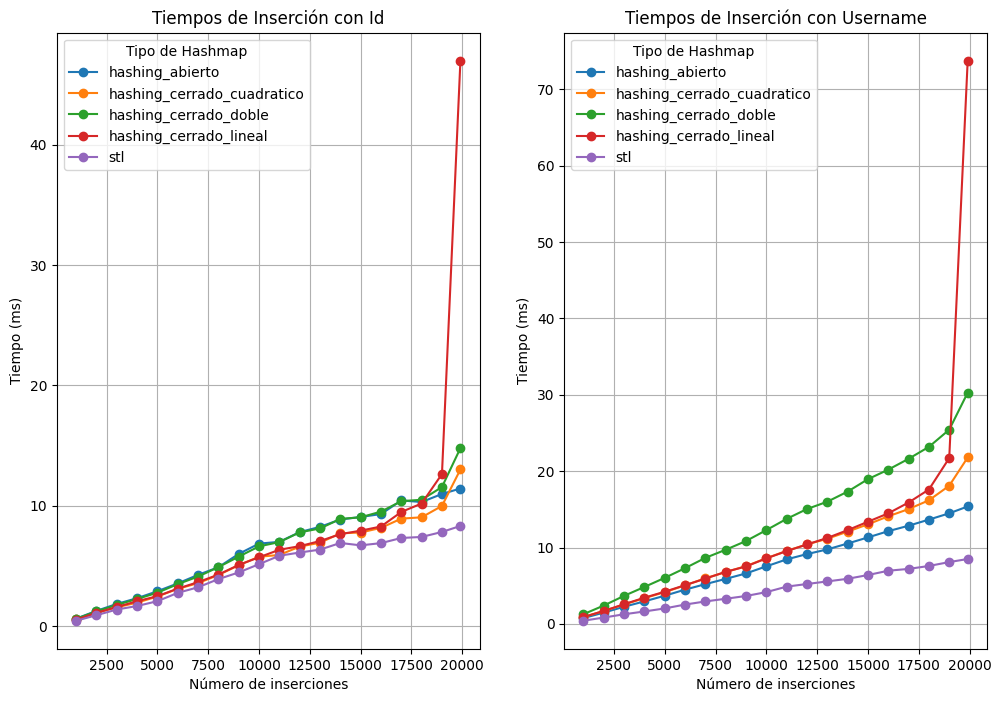

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["inserciones"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["inserciones"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [5]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.203091  0.415139  0.659700  0.998226   
1      hashing_cerrado_lineal  0.180757  0.372564  0.578681  0.887557   
2  hashing_cerrado_cuadratico  0.179240  0.369987  0.589135  0.887769   
3       hashing_cerrado_doble  0.204547  0.431176  0.675624  0.999277   
4                         stl  0.161215  0.317812  0.484738  0.729947   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  1.450900  1.759471  2.088413  2.407854  2.775716  ...  3.276436  3.684555   
1  1.274794  1.579295  1.914396  2.222797  2.574408  ...  3.076573  3.418192   
2  1.287086  1.636202  1.966865  2.315600  2.722752  ...  3.299838  3.661191   
3  1.425062  1.772529  2.129303  2.515122  2.877037  ...  3.608685  4.092375   
4  1.045477  1.265988  1.488279  1.758234  1.907942  ...  2.319058  2.632804   

      13000     14000     15000     16000     17000     18000     19000  \
0  3.

In [6]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='nbusquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='nbusquedas', value_name='tiempo')

print(df_id_melted.head())

df_id_melted['nbusquedas'] = df_id_melted['nbusquedas'].astype(int)
df_usr_melted['nbusquedas'] = df_usr_melted['nbusquedas'].astype(int)

                         mapa nbusquedas    tiempo
0             hashing_abierto       1000  0.203091
1      hashing_cerrado_lineal       1000  0.180757
2  hashing_cerrado_cuadratico       1000  0.179240
3       hashing_cerrado_doble       1000  0.204547
4                         stl       1000  0.161215


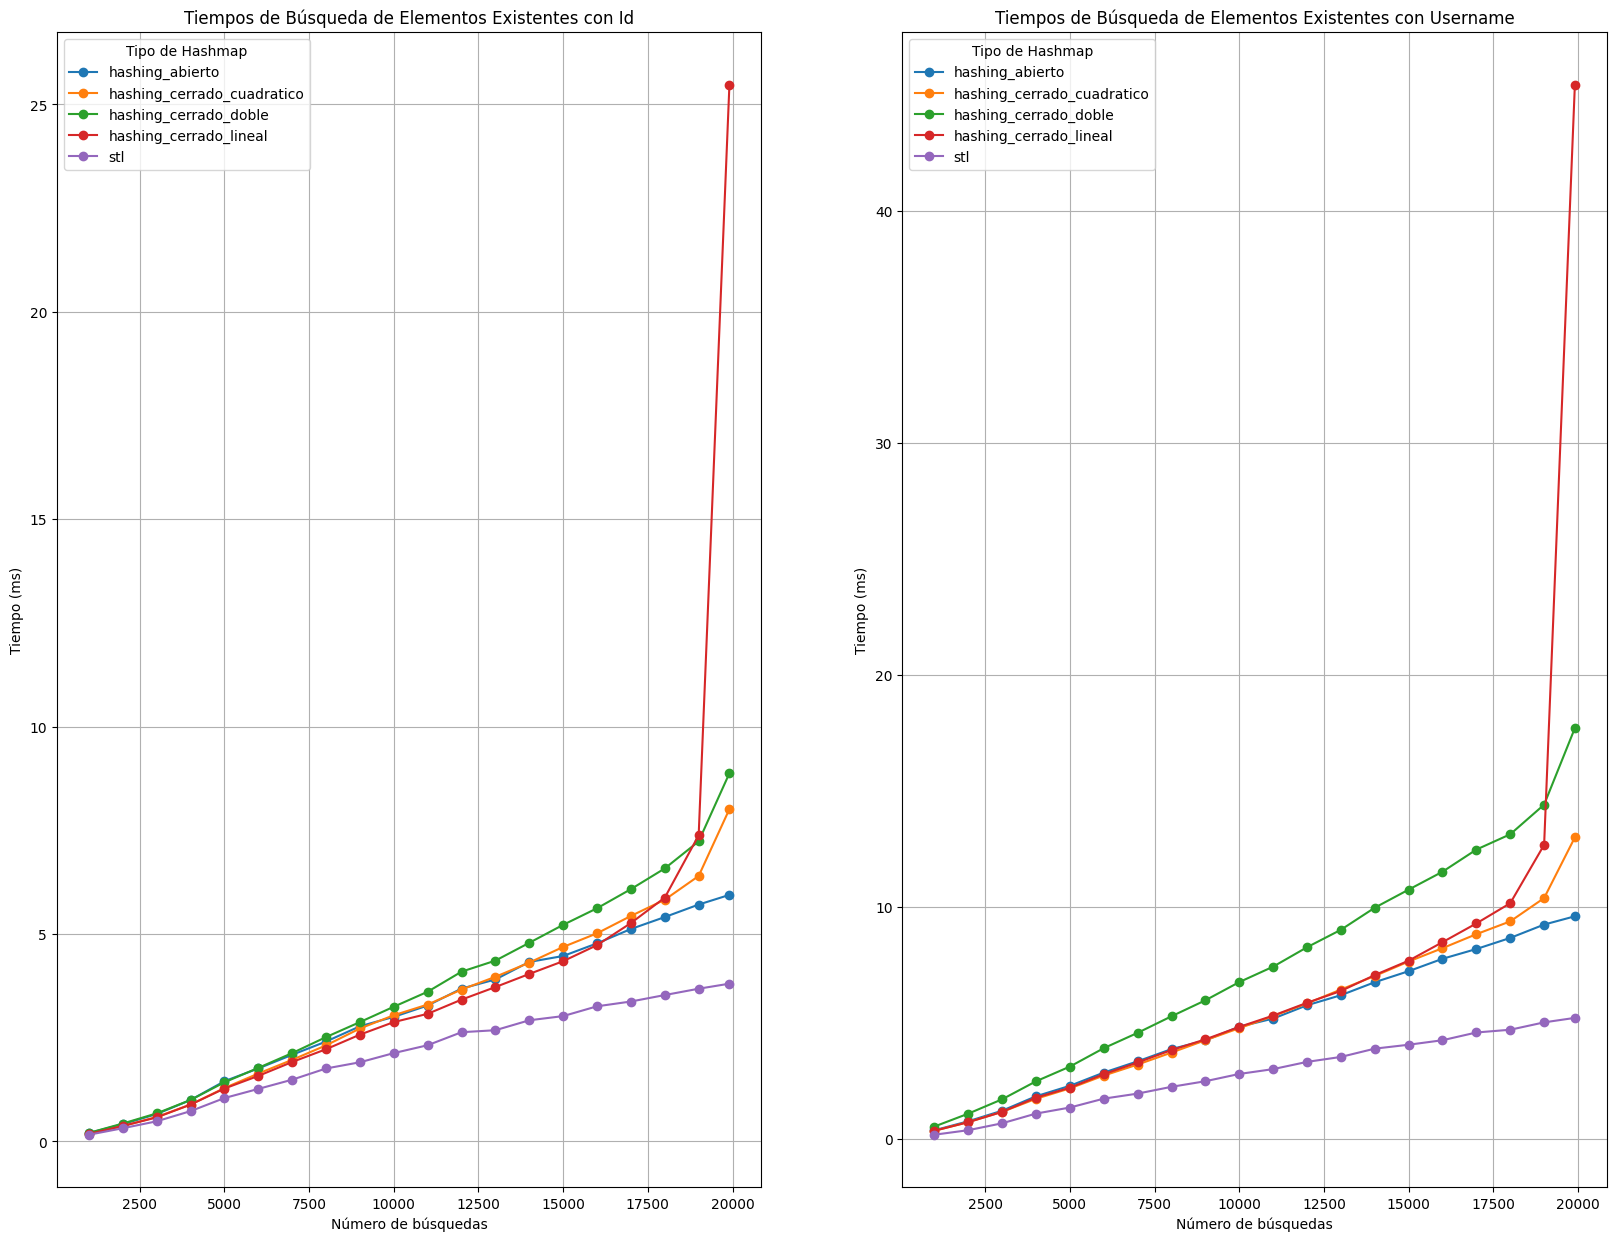

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["nbusquedas"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["nbusquedas"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [8]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.116684  0.224570  0.313047  0.399913   
1      hashing_cerrado_lineal  0.120648  0.246080  0.324386  0.447383   
2  hashing_cerrado_cuadratico  0.119988  0.235160  0.333048  0.424344   
3       hashing_cerrado_doble  0.157914  0.309569  0.444621  0.570029   
4                         stl  0.183576  0.324179  0.453114  0.596954   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.522821  0.622437  0.797287  0.894462  0.965957  ...  1.255534  1.353686   
1  0.541028  0.659183  0.815270  0.904340  1.013759  ...  1.242471  1.356013   
2  0.524241  0.626428  0.784175  0.911415  0.995647  ...  1.205034  1.340745   
3  0.729308  0.852714  1.100264  1.201341  1.365374  ...  1.670759  1.837880   
4  0.731176  0.889678  1.113239  1.251214  1.372800  ...  1.752721  1.985362   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [9]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')

df_id_melted['busquedas'] = df_id_melted['busquedas'].astype(int)
df_usr_melted['busquedas'] = df_usr_melted['busquedas'].astype(int)

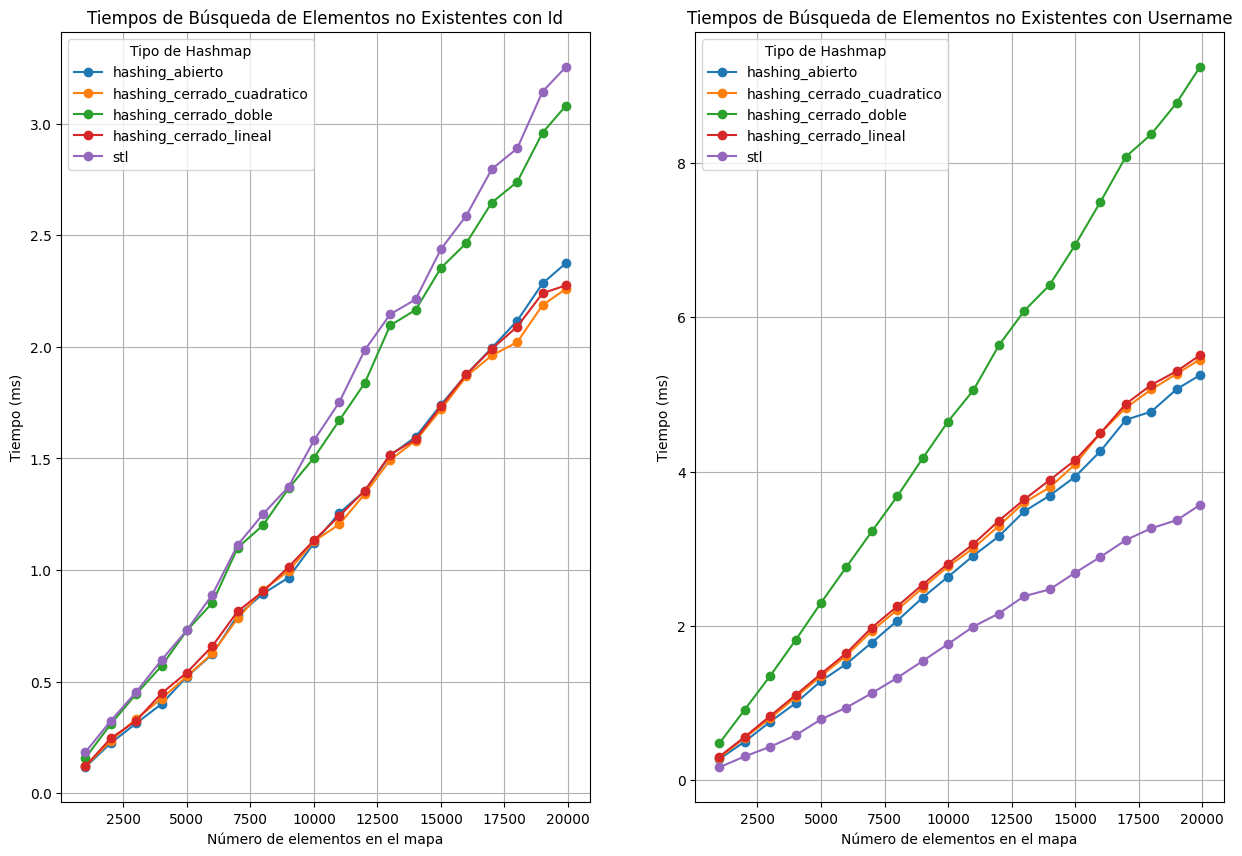

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de elementos en el mapa")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()